```
     ___    ______                           __    ___ 
    /   |  / ____/________ _____ ___  ____  / /__ |__ 
   / /| | / /_  / ___/ __ `/ __ `__ \/ __ \/ / _ \__/ /
  / ___ |/ __/ (__  ) /_/ / / / / / / /_/ / /  __/ __/ 
 /_/  |_/_/   /____/\__,_/_/ /_/ /_/ .___/_/\___/____/ 
                                  /_/                  
```

This notebook serves as a summary and reproducibility record for all plots generated for the AFsample2 manuscript.

Article (preprint) [AFsample2: Predicting multiple conformations and ensembles with AlphaFold2](https://www.biorxiv.org/content/10.1101/2024.05.28.596195v1)  

<sup><sub>ASCII art generated with https://patorjk.com/software/taag/</sub></sup>

In [18]:
'''
# Environment Setup Instructions (Runnable)
To ensure a consistent environment, run the following cells in order to create and activate a Conda environment with the required dependencies.

# Steps
1. **Create a new Conda environment** (if not already created)
2. **Activate the environment** (handled automatically in Jupyter)
3. **Install required dependencies**
4. **Register the environment as a Jupyter kernel**
5. **Restart the notebook and select the new kernel**

**Run the cells below to set up the environment.**
'''

RUN_SETUP = False  # Change to True to enable environment setup
GET_DATA = True  # Change to True to download data required to run this notebook (200 MB)

if RUN_SETUP:
    !conda create -n dummyenv python=3.9 -y
    !conda run -n dummyenv pip install ipykernel
    !conda run -n dummyenv python -m ipykernel install --user --name=dummyenv --display-name "Python (dummyenv)"
    !conda list -n dummyenv
else:
    print('RUN_SETUP set to False. Skipping env setup... \nMake sure that required environment is installed and selected for the notebook before proceeding.')

# Final Steps:
# Restart the Jupyter Notebook.
# Go to Kernel -> Change Kernel and select "Python (my_env)".
# This ensures that your notebook runs in the newly created Conda environment.


RUN_SETUP set to False. Skipping env setup... 
Make sure that required environment is installed and selected for the notebook before proceeding.


### Figure 2: Overall summary and analysis of MSA randomization strategy in AFsample2
(a) Effectiveness of the MSA randomization strategy in terms of generating high-quality models and aggregate confidence for both open and closed states. The results indicate 15\% randomization to have the highest TM-scores in the OC23 dataset.(b) Per target best open and closed models for different MSA randomizations. (c) Highest TM-scores for open and close conformation with number of samples generated. Sampling more models increases the chances of generating better models, and is significantly more potent with the proposed randomizations.

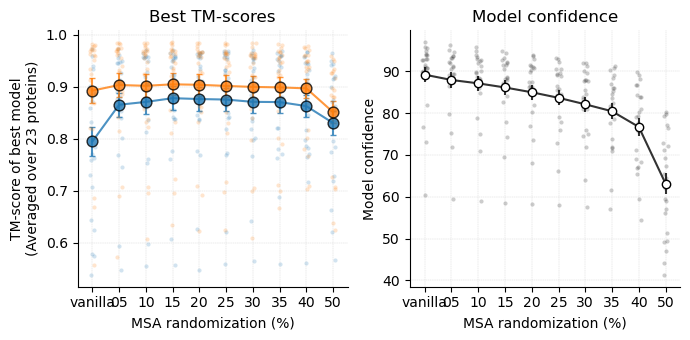

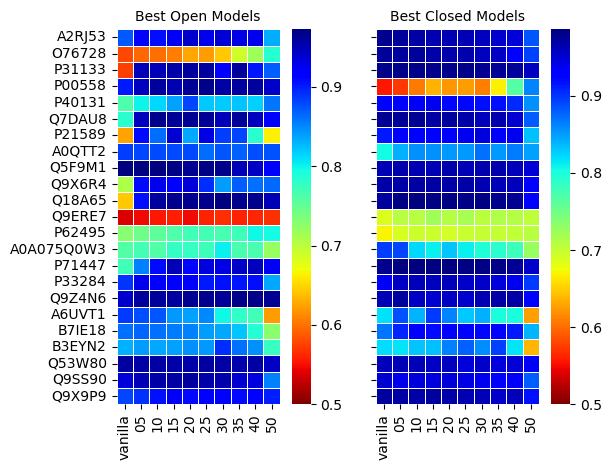

['vanilla', '05', '10', '15', '20', '25', '30', '35', '40', '50']


100%|██████████| 10/10 [03:12<00:00, 19.20s/it]


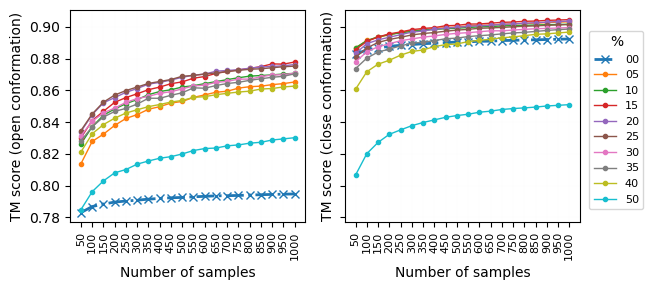

In [10]:
# --------------------------------
# Figure 2 (a,b,c)
# --------------------------------
# Expected DataFrame structure:
# Columns:
# - 'model_path' (str): File path to the model results
# - 'confidence' (float): Confidence score of the model
# - 'model_name' (str): Model name identifier (e.g., "model_1_ptm")
# - 'model_pdb' (str): Filename of the predicted PDB structure
# - 'state' (str): Model state (e.g., "TM_open")
# - 'tmscore' (float): TM-score for model quality assessment
# - 'uniprotid' (str): Unique protein identifier
# - 'rand' (str): Randomization category (e.g., "vanilla")

# Example:

#     model_path                                  | confidence | model_name  | model_pdb                                     | state   | tmscore | uniprotid | rand  
#     --------------------------------------------------------------------------------------------------------------------------
#     data/result_model_1_ptm_pred_80_vanilla.pkl | 89.91       | model_1_ptm  | unrelaxed_model_1_ptm_pred_80_dropout.pdb | TM_open | 0.53115 | A2RJ53   | vanilla
#     data/result_model_1_pred_9_vanilla.pkl      | 90.85       | model_1      | unrelaxed_model_1_pred_9_dropout.pdb      | TM_open | 0.57069 | A2RJ53   | 15
#     data/result_model_2_ptm_pred_53_vanilla.pkl | 89.64       | model_2_ptm  | unrelaxed_model_2_ptm_pred_53_dropout.pdb | TM_open | 0.56201 | A2RJ53   | 30

from plotting_functions import ProteinDataAnalyzer
analyzer = ProteinDataAnalyzer("../analysis_results/general/master_df_good.csv")
analyzer.analyze()

### Figure 3: AFsample2 demonstrates a higher ability to generate good-quality open and closed conformations than baseline methods   
(a) Comparing TM-scores of best models generated for open and closed states by all methods. (b) Best generated models for the OC23 dataset by all methods under consideration in terms of similarity (TMscore) to the reference states show significant (\textit{Wilcoxon signed-rank test p-value: *<0.05, **<0.01, ***<0.001, n=23)} improvement, especially for the open state, (c) Fraction of successful targets compared among methods at different levels of TM-score thresholds. Success: TM-score > threshold (for both states), (d) comparing the minimum of the best two selections (one for each state) for all methods against AFsample2 $|\Delta |$TM<0.05 in gray, green AFsample2 improved, red AFsample2 worsen (Wilcoxon signed-rank test p-value, n=23)); (e) Improvement of AFsample2 over AFvanilla for open and closed conformations, (f) Examples illustrating generated states by AFsample2 along with their similarity to reference pdbs.

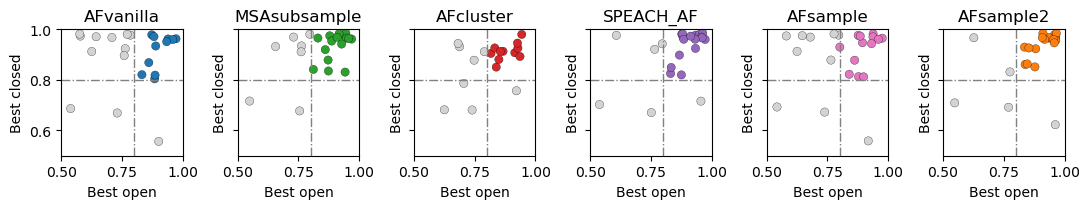

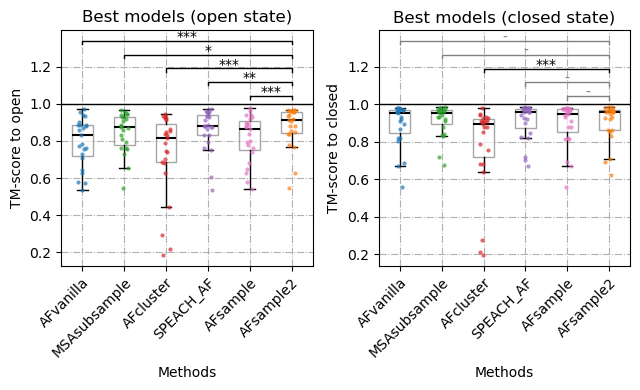

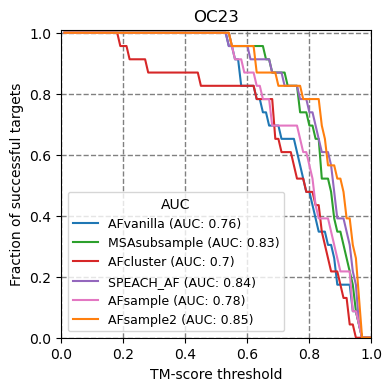

AFvanilla AFsample2 1.19e-06
MSAsubsample AFsample2 1.92e-02
AFcluster AFsample2 3.66e-05
SPEACH_AF AFsample2 1.38e-02
AFsample AFsample2 2.26e-06


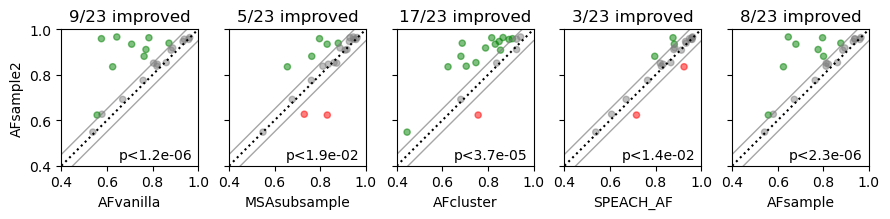

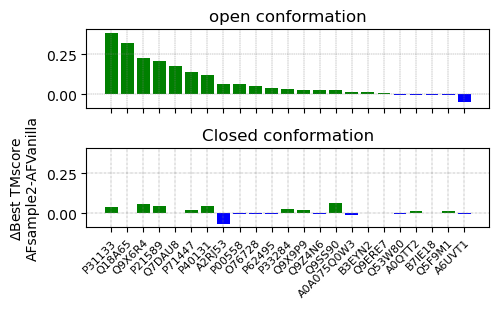

In [ ]:
# --------------------------------
# Figure 3
# --------------------------------
# Expected DataFrame structure:
# Columns:
# - 'uniprotid' (str): Unique protein identifier
# - 'AFvanilla' (float): Score from AF vanilla model
# - 'MSAsubsample' (float): Score from MSA subsample
# - 'AFcluster' (float): Score from AF clustering
# - 'SPEACH_AF' (float): Score from SPEACH_AF method
# - 'AFsample' (float): Score from AF sample method
# - 'AFsample2' (float): Score from AF sample2 method

# Example:
#   uniprotid  | AFvanilla | MSAsubsample | AFcluster | SPEACH_AF | AFsample | AFsample2
#   -----------------------------------------------------------------------------
#   A2RJ53     |  0.87205  |    0.87878   |  0.68717  |  0.93350  |  0.87654 |  0.93906
#   O76728     |  0.57797  |    0.72989   |  0.18369  |  0.60689  |  0.58054 |  0.62655

from plotting_functions import BestModelsPlotter
dataset = 'OC23'
best_tms_o_path = '../analysis_results/general/best_tmso_oc23.csv'
best_tms_c_path = '../analysis_results/general/best_tmsc_oc23.csv'

plotter_oc23 = BestModelsPlotter(best_tms_o_path, best_tms_c_path, dataset)
plotter_oc23.main()

### Figure 4: Analysing diversity of generated ensembles.
(a) Diversity plot showing similarity of generated models with open and closed reference structures for AFsample2 ensemble on selected target from OC23 dataset along with an indicative representaion of fill-ratio.
(b) Comparing \textit{fill ratios} of the model ensembles generated by all methods under consideration for all targets in the OC23 dataset.
(c) Heatmap summarizing \textit{fill-ratios} for all targets in the OC23 dataset when compared between methods.}

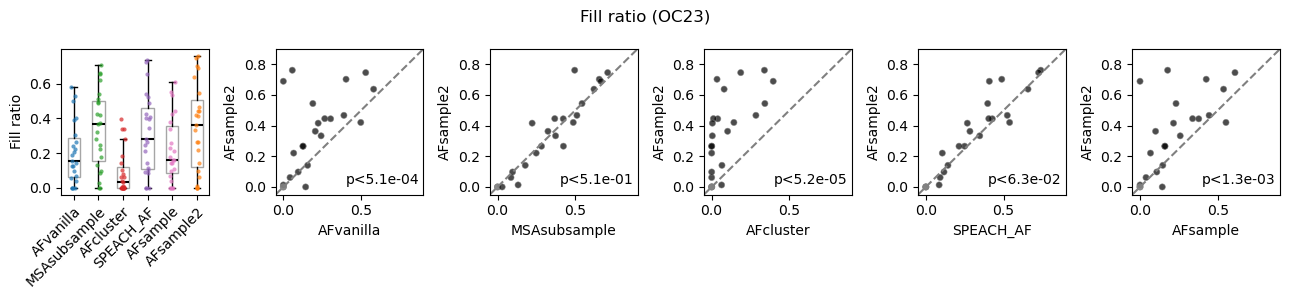

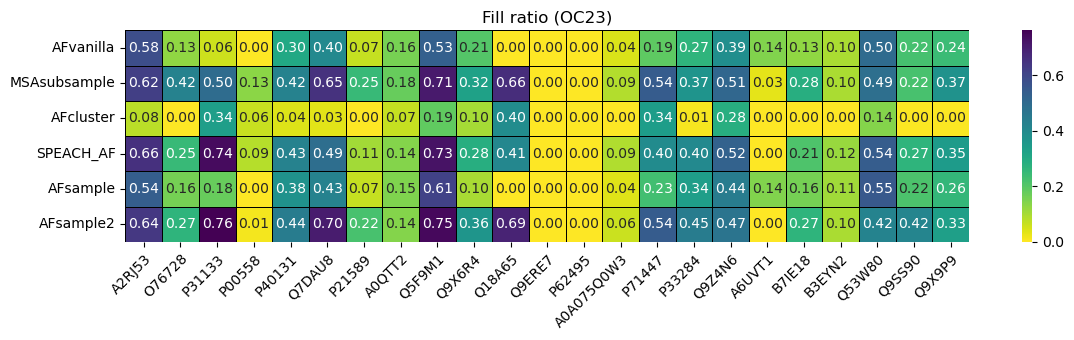

In [2]:
# --------------------------------
# Figure 4
# --------------------------------

# Dataframe Example:
#   uniprotid  | AFvanilla | MSAsubsample | AFcluster | SPEACH_AF | AFsample | AFsample2
#   -----------------------------------------------------------------------------
#   A2RJ53     |  0.87205  |    0.87878   |  0.68717  |  0.93350  |  0.87654 |  0.93906
#   O76728     |  0.57797  |    0.72989   |  0.18369  |  0.60689  |  0.58054 |  0.62655

from plotting_functions import plot_fillratio
import pandas as pd

dataset = 'OC23'
fillratio2_df = pd.read_csv('../analysis_results/general/fillratio_df_oc23.csv', index_col=0)
plot_fillratio(fillratio2_df, dataset)

### Figure 5: AFsample2 ensembles mapped to PDB.
Experimental structures in the PDB with similar sequences (>90\%) shown with there corresponding TMscore. The closest model mapped to the PDB (sequence similarity >90\%) is annotated with colors.(a)-(d) show cases where it was possible to find structural intermediates, (e)-(h) show cases where no intermediates were found in PDB.

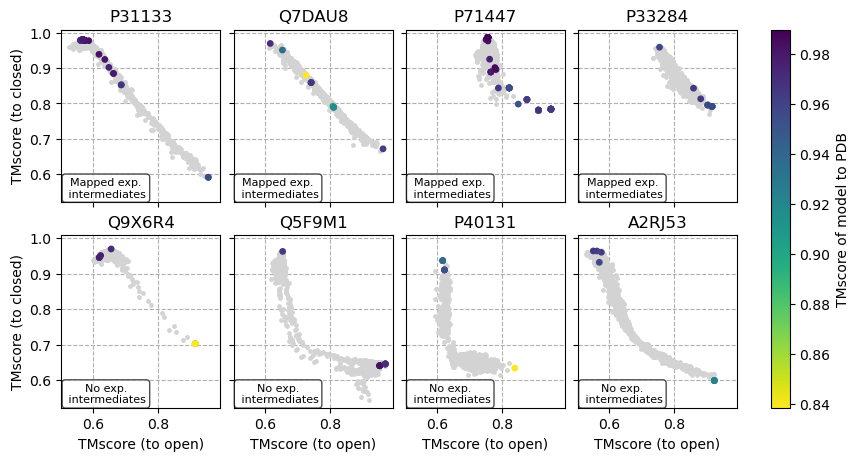

In [1]:
# --------------------------------
# Figure 5
# --------------------------------

from plotting_functions import ProteinDataAnalyzer
analyzer = ProteinDataAnalyzer("../analysis_results/general/master_df_good.csv")

datapath = '../analysis_results/general/'
intermediates_df_path = f'{datapath}/intermediates_summary.csv'
analyzer.plot_intermediates(intermediates_df_path)

### Figure 6: Comparing ensemble fluctuations with reference states. (a) Analysing the amount of residue fluctuations observed by all methods in consideration. 
(a) A consolidated analysis of per-residue fluctuations observed in the model ensemble for B3EYN2 and its correlation with C-α distances between experimental states, for
AFvanilla and AFsample2 (b) Comparing correlation statistics for all proteins in the OC23 dataset between methods. (c) Relationship between fill-ratio (quantifies ensemble
diversity) and correlation in ensemble fluctuation with per-residue reference distances.

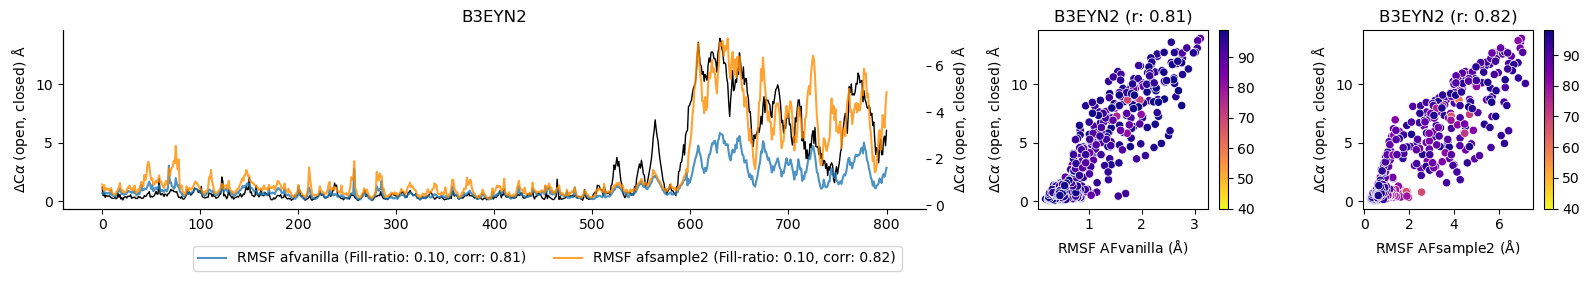

In [1]:
# --------------------------------
# Figure 6 & S4
# --------------------------------
from plotting_functions import plot_fluctuation_correlation

data1_path = '/proj/wallner-b/users/x_yogka/AFsample2/revision/results/automated_f_corr_afvanilla_d35_patched.pkl'	# randomref is with d0=3.5
data3_path = '/proj/wallner-b/users/x_yogka/AFsample2/revision/results/automated_f_corr_afsample2_d35_patched.pkl'

protein = 'B3EYN2'
fill_ratio_path = '../analysis_results/general/fillratio_df_oc23.csv'
plot_fluctuation_correlation(protein, data1_path, data3_path, fill_ratio_path)

### Figure 7: Reference-free state determination. 
(a) Schematic illustrating the process of identifying open and closed states from a pool of generated models. (b, e) Mean
squared error (MSE) between the TM-scores of selected and best possible model for AFsample2 and AFcluster. (c, d) Scatter plot between TM-scores of selected models
and best possible models generated by AFsample2 for all targets in the OC23 dataset (f,g - for AFcluster). An example with target Q5F9M1 showing (h) diversity plot and (i)
reference-free plot. The reference-free plot has been annotated with optimal selections for the open and closed state (j, k - AFcluster). (l) Comparing selected open (left) and
closed (right) models with the reference-free strategy for AFsample and AFcluster.

Best conf_threshold: 0.0, 0, losses: 0.12236391304347827
Best conf_threshold: 84.81100245721197, 90, losses: 0.11879260869565217


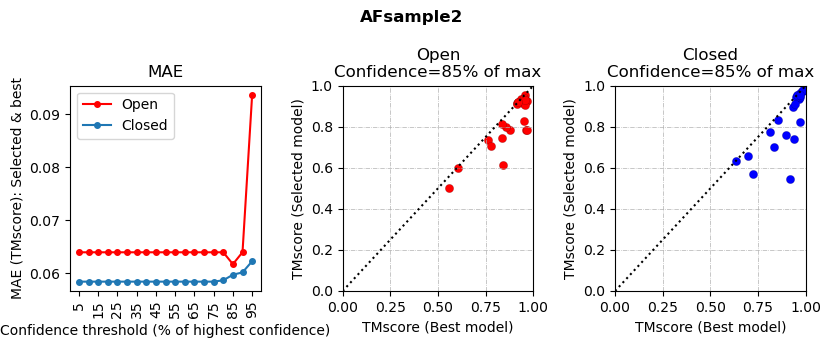

Best conf_threshold: 0.0, 0, losses: 0.5488778260869566
Best conf_threshold: 30.79699, 35, losses: 0.5433478260869565
Best conf_threshold: 35.19656, 40, losses: 0.5267717391304347
Best conf_threshold: 39.59613, 45, losses: 0.5027073913043477
Best conf_threshold: 43.9957, 50, losses: 0.46436260869565216
Best conf_threshold: 48.395270000000004, 55, losses: 0.42449869565217385
Best conf_threshold: 52.79484, 60, losses: 0.3976417391304349
Best conf_threshold: 57.19441, 65, losses: 0.34978347826086953
Best conf_threshold: 61.59398, 70, losses: 0.32929956521739134
Best conf_threshold: 65.99355, 75, losses: 0.2771065217391304
Best conf_threshold: 70.39312, 80, losses: 0.22168434782608698
Best conf_threshold: 74.79269, 85, losses: 0.16317434782608697
Best conf_threshold: 79.19226, 90, losses: 0.11970173913043478
Best conf_threshold: 83.59183, 95, losses: 0.10126652173913045


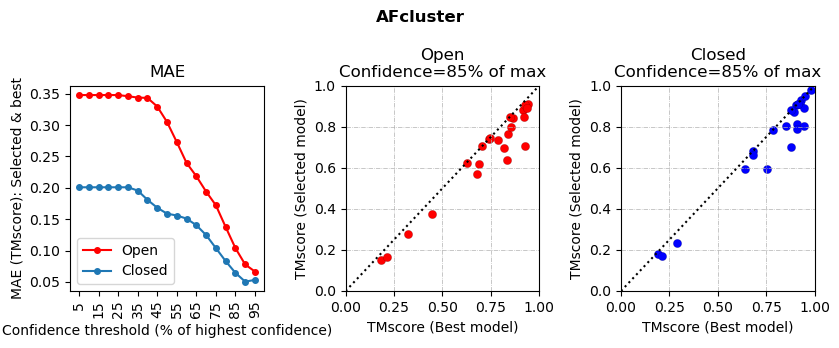

In [1]:
from plotting_functions import ReferenceFreeSelection
import pickle
import pandas as pd

# Load filtered dictionary
with open('../input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}
selection = ReferenceFreeSelection(good_examples)

# Process AFsample2
afsample_df = pd.read_csv('../analysis_results/general/rand_dfs_afsample2_oc23.csv')    # AFsample2 results at 15% randomization
best_result, maes_o_rolling, maes_c_rolling = selection.run(afsample_df)
selection.plot_results(best_result, maes_o_rolling, maes_c_rolling, 'AFsample2')

# Process AFcluster
afcluster_df = pd.read_csv(f'../analysis_results/general/rand_dfs_afcluster_oc23.csv')   # AFcluster results
best_result, maes_o_rolling, maes_c_rolling = selection.run(afcluster_df)
selection.plot_results(best_result, maes_o_rolling, maes_c_rolling, 'AFcluster')

### Figure 8: AFsample2 tested on a transporter dataset with 16 targets. 
(a) Comparing TM-scores of best models generated for inward-facing and outward-facing states for
all targets and methods on the TP16 set, (b) Distribution of best generated models for the TP16 dataset by all methods under consideration in terms of similarity (TMscore)
to the reference states show significant (Wilcoxon signed-rank test p-value: *<0.05, **<0.01, ***<0.001, - ns)), (c) Fraction of successful targets compared among methods at
different levels of TM-score thresholds. Success: TM-score > threshold (for both states), (d) Comparing the minium of the best selection for all methods against AFsample2
∆TM<0.05 in gray, green AFsample2 improved, red AFsample2 worsen;

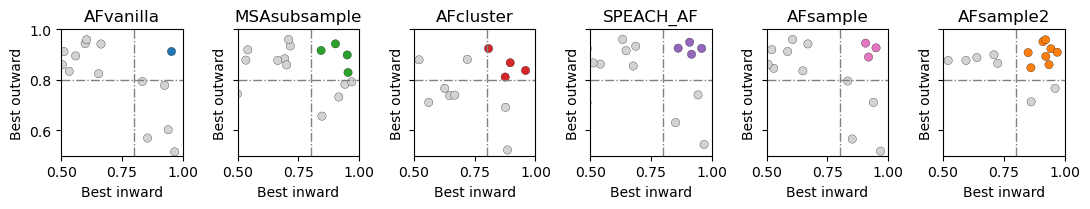

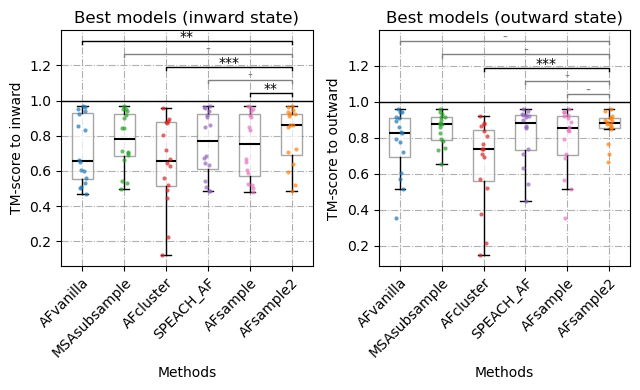

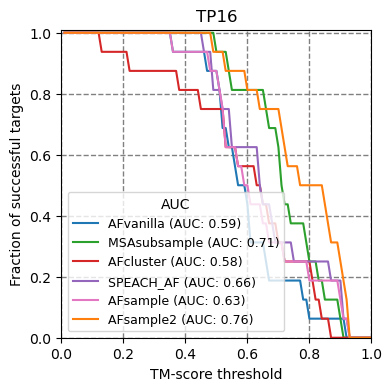

AFvanilla AFsample2 4.58e-05
MSAsubsample AFsample2 2.22e-02
AFcluster AFsample2 2.90e-04
SPEACH_AF AFsample2 1.68e-02
AFsample AFsample2 2.90e-04


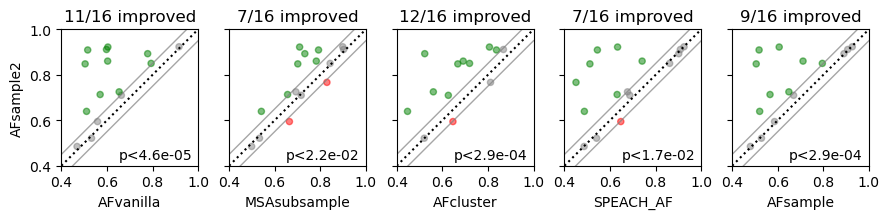

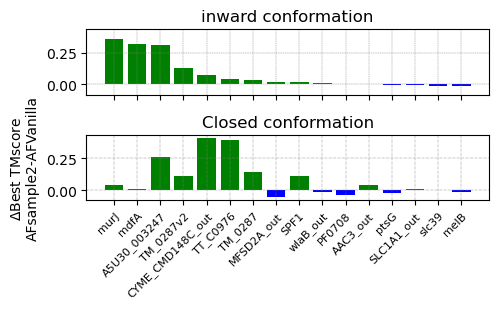

In [ ]:
from plotting_functions import BestModelsPlotter
best_tms_o_path = '../analysis_results/general/best_tm_ou_tp16.csv'
best_tms_c_path = '../analysis_results/general/best_tm_in_tp16.csv'
dataset = 'TP16'
plotter_tp16 = BestModelsPlotter(best_tms_o_path, best_tms_c_path, dataset)
plotter_tp16.main()